In [114]:
import pandas as pd

In [115]:
df = pd.read_csv('.\Data\docs_for_cluster_new.csv')

In [116]:
import jieba
import re

In [136]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\u4e00-\u9fa5]+', ' ', text)
    return text

In [138]:
stopwords_set = []
with open('./stopwords.txt','r',encoding='gb18030') as f:
    for i in f.readlines():
        stopwords_set.append(i.strip())
stopwords_set.extend(['教学','研究','方法','分析','基于','利用','一个','一类','影响','本文','一种','两个','建立','结论','采用','模型','用于','提出',
                      '我国','学生','大学生','提升','中国'])


len(stopwords_set)

1418

In [139]:
def split_and_filter_words(text):
    global stopwords_set
    words = jieba.cut(text,cut_all=False)
    w_lis = []
    for w in words:
        if w not in stopwords_set and len(w)>1:
            w_lis.append(w)

    return ' '.join(w_lis)

In [140]:
df['preprocess'] = df['text'].apply(preprocess)
df['split_and_filter'] = df['preprocess'].apply(split_and_filter_words)
df.head()

,class,text,preprocess,split_and_filter
0,O1,一个考虑染色体端粒长度的肿瘤细胞分裂增长模型的定性分析 肿瘤细胞分裂增长模型/染色体端粒长度...,一个考虑染色体端粒长度的肿瘤细胞分裂增长模型的定性分析 肿瘤细胞分裂增长模型 染色体端粒长度...,染色体 端粒 长度 肿瘤 细胞分裂 增长 定性分析 肿瘤 细胞分裂 增长 染色体 端粒 长度...
1,O1,一类具有潜伏期检测和外源性再感染的随机结核病模型动力学分析 随机结核病模型/潜伏期检测/外源...,一类具有潜伏期检测和外源性再感染的随机结核病模型动力学分析 随机结核病模型 潜伏期检测 外源...,潜伏期 检测 外源性 感染 随机 结核病 动力学 随机 结核病 潜伏期 检测 外源性 感染 ...
2,O1,具有分段常数参数的Cohen-Grossberg神经网络的全局指数稳定 Cohen-Gros...,具有分段常数参数的 神经网络的全局指数稳定 神经网络 分段常数参数 李雅普诺夫函数 全局指数...,分段 常数 参数 神经网络 全局 指数 稳定 神经网络 分段 常数 参数 李雅普 诺夫 函数...
3,O1,关于*r-clean环 *r-clean环/*-clean环/*-正则环 称对合环为*r-c...,关于 环 环 环 正则环 称对合环为 环是指环中任一元素都可表示为投射子和 正则元的和 研究...,正则 对合 环为 环是 指环 任一 元素 投射 正则 扩张 性质 给出 阿贝尔 元素 刻画
4,O1,通信类研究生数学建模能力的培养与实践 四位一体/数学建模/创新能力/科研赋能 培养高层次科技...,通信类研究生数学建模能力的培养与实践 四位一体 数学建模 创新能力 科研赋能 培养高层次科技...,通信 研究生 数学 建模 能力 培养 实践 四位一体 数学 建模 创新能力 科研 赋能 培养...


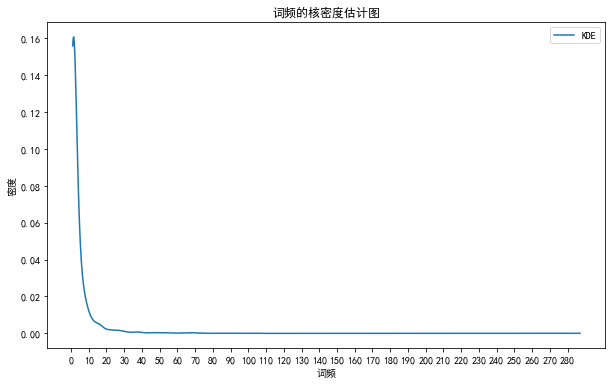

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 转换文本数据
count_vec = vectorizer.fit_transform(df['split_and_filter'])
count_vec = count_vec.toarray()

# 计算每个单词的出现次数
word_counts = count_vec.sum(axis=0)

x = np.linspace(min(word_counts), max(word_counts), 1000)

# 计算核密度估计
kde = gaussian_kde(word_counts)

# 在点集x上评估KDE
kde_values = kde.evaluate(x)

# print(kde_values)
# 绘制KDE曲线
plt.figure(figsize=(10, 6))
plt.plot(x, kde_values, label='KDE')
plt.xticks(np.arange(0, max(x)+1, 10))

# 添加标题和轴标签
plt.title('词频的核密度估计图')
plt.xlabel('词频')
plt.ylabel('密度')

# 显示图例
plt.legend()

plt.savefig('./Pic/docs_wc/Frequency.png')
# 显示图形
plt.show()


In [183]:
count_vec.shape,(word_counts>4).sum()

((300, 5405), 1210)

In [189]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(min_df=3)

# 转换文本数据
count_vec = vectorizer.fit_transform(df['split_and_filter'])
count_vec = count_vec.toarray()
count_vec.shape

(300, 1140)

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=3)

# 转换文本数据
tfidf_vec = vectorizer.fit_transform(df['split_and_filter'])
tfidf_vec = tfidf_vec.toarray()
tfidf_vec.shape

(300, 1140)

dict_keys(['数学', '矩阵', '算子', '学习', '高职', '实践', '空间', '教育', '建模', '课程', '混合式', '方程', '不等式', '课堂', '控制', '培养', '给出', '证明', '指数', '线性', '函数', '发展', '高等数学', '评价', '指标', '工作', '理论', '能力', '学科', '模糊', '技术', '总双', '罗马', '媒体', '半群', '构造', '稳定性', '综合', '维数', '奇异', '设备', '结核病', '实施', '系数', '局部', '融合', '临界', '变电', '翻转', '全局', '探究', '研究生', '顶点', '解析', '水平', '深度', '教学改革', '价值', '有限', '变换', '微分方程', '检修', '肿瘤', '条件', '通信', '创新能力', '理念', '社会', '数据', '估计', '时间', '文章', '模式', '框架', '策略', '形式', '生成', '故障', '系统', '性质', '创新', '体系', '加权', '向量', '分量', '混合', '四面体', '体积', '计算', '下界', '方程解', '基础', '意义', '讨论', '构建', '专业', '非线性', '方案', '过程', '党建'])


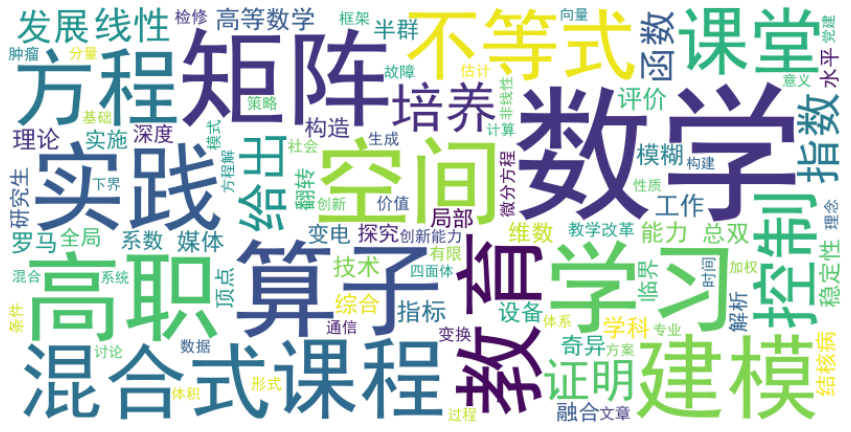

dict_keys(['火星', '光谱', '太阳', '观测', '数据', '黑洞', '天文', '科学', '过程', '地质', '单元', '物质', '表面', '测量', '撞击', '系统', '发展', '特征', '望远镜', '变化', '星系', '参数', '探测', '天线', '优化', '温度', '结构', '发现', '历法', '提供', '射电', '活动', '分布', '对称', '反射体', '结果表明', '增加', '平原', '计算', '时间', '国家', '空间', '红外', '图像', '演化', '模式', '实验', '气体', '大气', '环境', '行星', '生成', '仿真', '西藏', '拉萨', '中子星', '电路', '设计', '乌托邦', '物理', '时代', '宇宙学', '引力波', '星象', '传统', '波段', '地球', '理论', '磁荷', '冰晶石', '变形', '并行', '磁场', '意义', '光谱仪', '厚度', '作用', '背景', '脉冲星', '调制', '辐射', '中国科学院', '历日', '模拟', '领域', '照片', '算法', '黄钾', '月壤', '熔盐', '卫星', '日照', '读出', '角度', '火星车', '历史', '现象', '干涉', '加权', '切趾'])


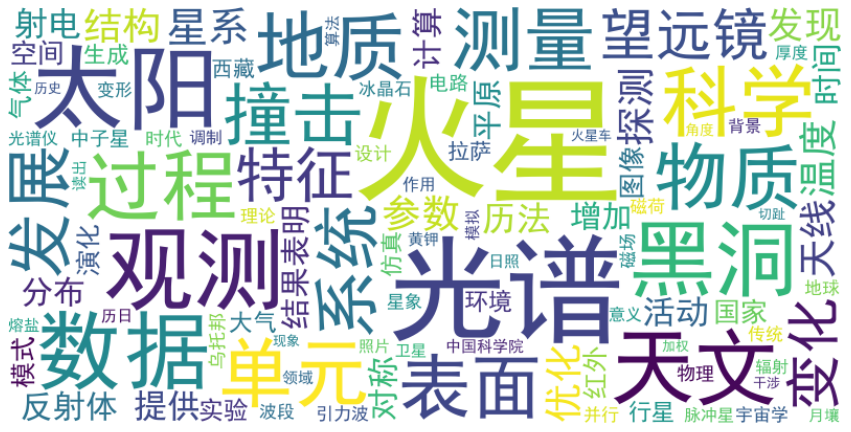

dict_keys(['蛋白', '检测', '细胞', '抗体', '制备', '生物', '表达', '结构', '小鼠', '目的', '临床', '工程', '支架', '培养', '验证', '构建', '相关', '免疫', '凝胶', '病毒', '抗原', '特异性', '重组', '组织', '活性', '提供', '推拿', '专业', '克隆', '疾病', '实验', '血清', '疫苗', '机制', '技术', '纯化', '因子', '药物', '抑制', '压力', '软骨', '工艺', '残留', '基因', '试验', '感染', '作用', '成功', '鉴定', '体外', '材料', '发展', '设计', '系统', '研究进展', '伤口', '孔径', '水平', '功能', '骨组织', '模拟', '图像', '筛选', '原核', '基础', '巨核细胞', '治疗', '能力', '过程', '大肠', '埃希菌', '分化', '肿瘤', '纳米', '位移', '分离', '解剖学', '力度', '设置', '恢复', '定位', '调控', '分子', '血小板', '综述', '信号', '假病毒', '高于', '表面', '钻石', '受力', '功能化', '动力学', '医师', '人工', '人体', '算法', '病理', '快速', '通路'])


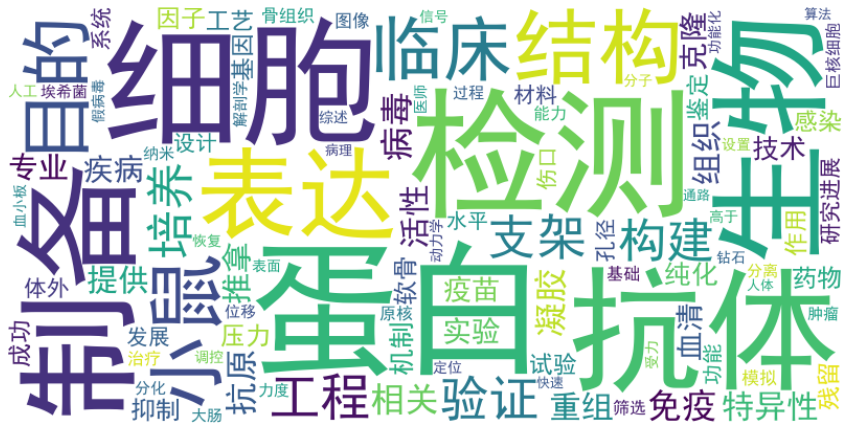

dict_keys(['发展', '养老', '人才培养', '电商', '数字', '能力', '经济', '服务', '跨境', '课程', '建设', '商务', '模式', '国际', '制造业', '智慧', '农产品', '创新', '实践', '产业', '创业', '目标', '电子商务', '背景', '构建', '路径', '服务业', '提供', '培养', '出口', '直播', '康养', '企业', '优化', '学习', '思政', '旅游', '推动', '市场', '商务英语', '专业', '健康', '中医药', '行业', '人才', '相关', '体系', '策略', '营销', '互联网', '数据', '融合', '教育', '居家', '消费', '对策', '理念', '深度', '资源', '需求', '因素', '网络', '宇宙', '周期', '地位', '面临', '客户', '技术', '提高', '高职', '政策', '农村', '知识', '卓越', '老年人', '俄罗斯', '农业', '时代', '现状', '教学模式', '方式', '社会', '外贸企业', '贸易', '购买', '平台', '产品', '系统', '价值链', '原油', '大豆', '进口', '商科', '陕西', '绿色', '特征', '流失', '实施', '生产性', '发现'])


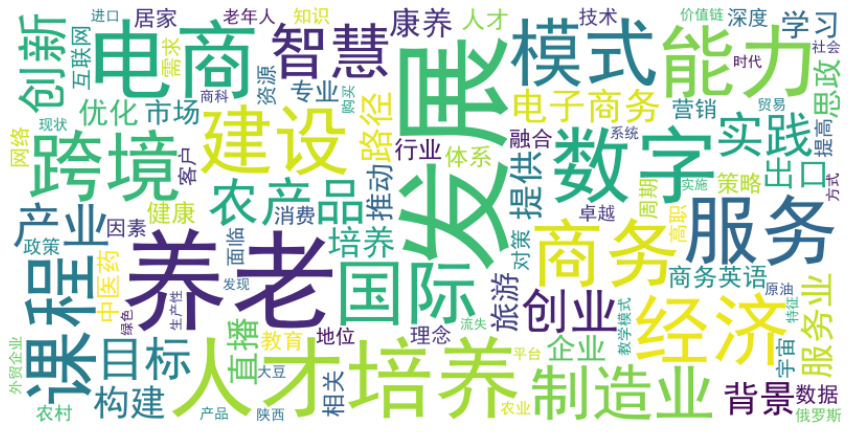

dict_keys(['体育', '发展', '乡村', '干预', '融合', '课程', '运动', '路径', '传播', '旅游', '振兴', '健康', '冰雪', '文化', '传统', '服务', '理论', '困境', '建设', '赋能', '数字', '思政', '女性', '提供', '健身', '经济', '教育', '高校', '技术', '供给', '模式', '消费', '优化', '治理', '糖尿病', '时代', '政策', '创新', '数字化', '文献资料', '逻辑', '畲族', '效率', '能力', '需求', '篮球', '资源', '水平', '推动', '基础', '景区', '现代化', '构建', '完善', '作用', '探讨', '顾客', '深度', '实践', '产业', '转型', '武术', '相关', '运动员', '满意度', '社会', '效果', '目标', '人才', '理念', '高质量', '背景', '国际', '体育赛事', '故事', '夜间', '民族', '体文旅', '体系', '地区', '推进', '下降', '提高', '价值', '趋势', '认同', '现实', '营养', '产业链', '社区', '游戏', '患者', '辽宁', '体育新闻', '打造', '精致', '露营', '建议', '活动', '因素'])


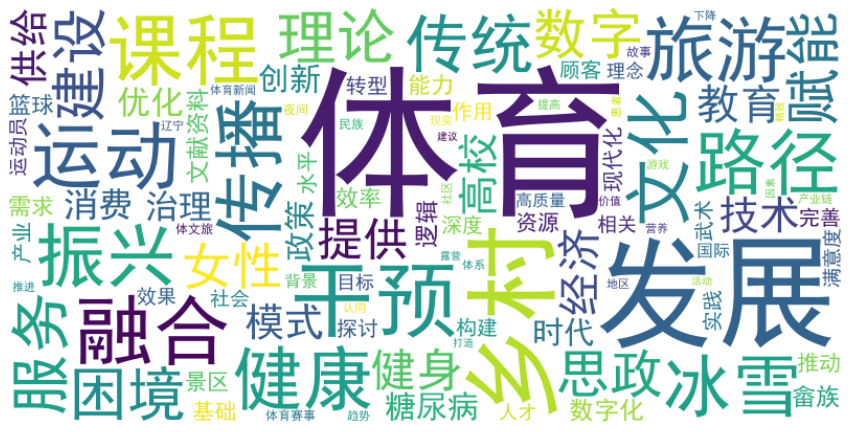

dict_keys(['统计', '工作', '发展', '数据', '能力', '调查', '统计法', '建设', '指数', '统计学', '社会', '总体', '高质量', '现代化', '样本', '教育', '基础', '治理', '实践', '创新', '系统', '测度', '城乡', '经济', '基层', '水平', '差距', '课程', '法治', '特征', '抽样', '专业', '提供', '质量', '习近平', '国家', '时代', '乡村', '文科', '提高', '事业单位', '学习', '管理', '推进', '思想', '服务', '理论', '依法', '振兴', '科学', '保障', '指标', '浙江', '数字化', '特色', '更新', '清查', '地区', '变动', '单元', '生活', '背景', '残疾人', '国家统计局', '总队', '智慧', '调查队', '总书记', '统计数据', '追踪调查', '估计', '路径', '乡镇', '融合', '推动', '战略', '思政', '就业', '以赛', '改革', '统计调查', '统计局', '主题', '企业', '人口', '简称', '区域', '差异', '中华人民共和国', '设计', '幸福美好', '强化', '内蒙古', '杭州', '大脑', '培养', '国际', '领域', '单位', '干部'])


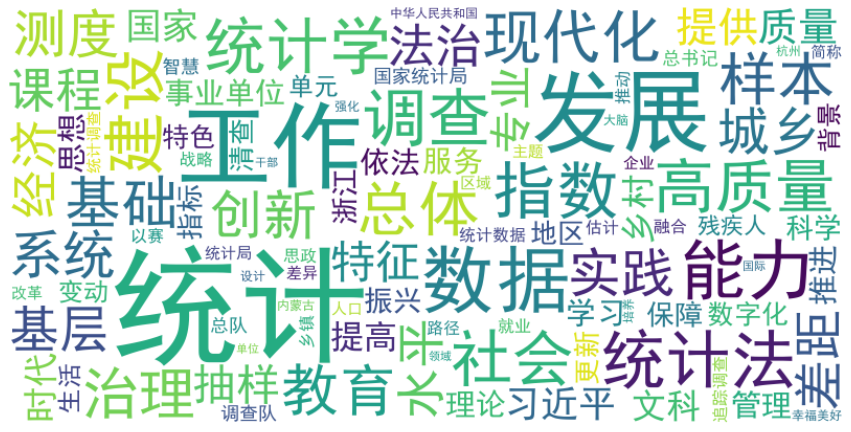

In [191]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

search_words = ['O1','P1','R3','F7','G8','C8']
# w = 'O1'
dff = pd.DataFrame()
for w in search_words:
    df_new = df[df['class']==w]
    s_list = (' '.join(df_new['split_and_filter'].tolist())).split()
    word_counts = Counter(s_list)
    wc = word_counts.most_common(100)
    print(dict(wc).keys())
    words_wc = dict(wc).keys()
    dff[w] = words_wc
    dff[w+'_times'] = dict(wc).values()

    # 创建词云对象
    wordcloud = WordCloud(
        font_path='simhei.ttf',  # 指定字体，确保支持中文显示
        width=800,
        height=400,
        background_color='white',
        stopwords=stopwords_set
    ).generate_from_frequencies(dict(wc))

    # 显示词云图
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 不显示坐标轴
    plt.savefig('./Pic/docs_wc/{}.png'.format(w))
    plt.show()
dff.head()
dff.to_csv('./Data/docs_fre_top100.csv',index=False)

In [192]:
df.to_csv('./Data/docs_prepared.csv',index=False)

In [193]:
count_vec = count_vec.transpose()
tfidf_vec = tfidf_vec.transpose()
count_vec.shape,tfidf_vec.shape

((1140, 300), (1140, 300))

In [194]:
import numpy as np
np.save('./Mat/docs_count.npy',count_vec)
np.save('./Mat/docs_tfidf.npy',tfidf_vec)

In [195]:
import time
st = time.time()
u, s, vh = np.linalg.svd(count_vec, full_matrices=True)
et = time.time()
print(et-st)

0.4144895076751709


In [196]:
import time
import numpy as np
tfidf_vec = np.load('./Mat/docs_tfidf.npy')
st1 = time.time()
u1, s1, vh1 = np.linalg.svd(tfidf_vec, full_matrices=True)
et1 = time.time()
print(et1-st1)

0.5436596870422363


In [197]:
def latent_space(u,s,vh,k):
    # un = u[:,:k]
    s = s[:k]
    sn = np.diag(s)
    vhn = vh[:k,:]
    return np.dot(sn,vhn)

In [198]:
k_list = np.arange(30,301,30)
k_list

array([ 30,  60,  90, 120, 150, 180, 210, 240, 270, 300])

In [199]:
ls_list1 = []
ls_list2 = []
for k in k_list:
    ls_list1.append(latent_space(u,s,vh,k))
    ls_list2.append(latent_space(u1,s1,vh1,k))

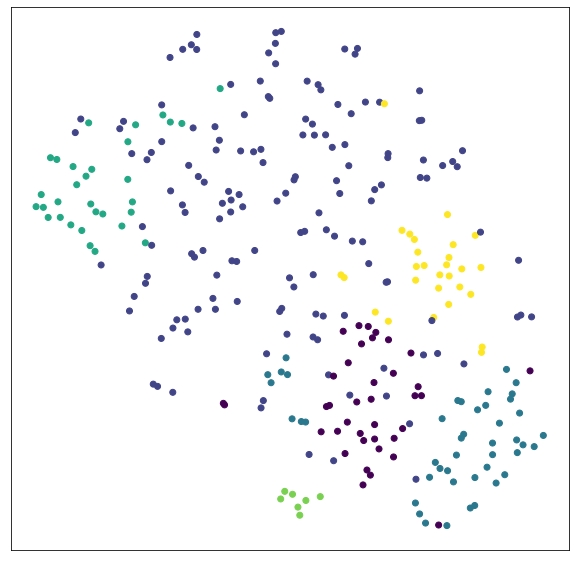

13.79091763496399


In [200]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_distances
cosine_distances(ls_list2[-1])
def clustering(X):
    # k = X.shape[0]
    # 初始化 KMeans
    st = time.time()
    # 执行聚类
    column_norms = np.linalg.norm(X, axis=0)

    # 避免除以零，如果范数为零，则设置为1
    column_norms[column_norms == 0] = 1

    # 对每一列进行标准化
    Xn = X / column_norms
    Xn = Xn.transpose()
    # dist = cosine_distances(Xn)
    # print(dist.shape)
    kmeans = KMeans(n_clusters=6,init='k-means++',n_init=1000)  # 设置聚类中心的数量为6

    kmeans.fit(Xn)

    
    # 获取聚类标签
    labels = kmeans.labels_
    et = time.time()

    t = et-st

    tsne = TSNE(n_components=2)
    decomposition_data = tsne.fit_transform(Xn)
    
    x = []
    y = []
    
    for i in decomposition_data:
        x.append(i[0])
        y.append(i[1])
    
    plt.figure(figsize=(10, 10))
    plt.axes()
    plt.scatter(x, y, c=labels, marker="o")
    plt.xticks(())
    plt.yticks(())
    plt.show()
    return labels,t
label,t = clustering(ls_list2[-1])
print(t)

In [201]:
import pandas as pd
df = pd.read_csv('./Data/docs_prepared.csv')
dic = {'O1':0,'C8':1,'P1':2,'R3':3,'F7':4,'G8':5}
df['type'] = [dic[i] for i in df['class']]
y_true = df['type'].tolist()
y_true=np.array(y_true)

def compute_purity(y_true,label):
    num = len(y_true)
    clusters = np.unique(label)
    cc = []
    for c in clusters:
        idx = np.where(label == c)[0]
        true_value = [y_true[i] for i in idx]
        # print(true_value)
        # print(np.bincount(true_value))
        cc.append(np.bincount(true_value).max())
    # print(cc)
    return np.sum(cc)/num


In [202]:
compute_purity(y_true,label)

0.5466666666666666

In [203]:
def compute_f_measure(y_true,label):
    cross_mat = np.zeros((6,6))
    precision = np.zeros((6,6))
    recall = np.zeros((6,6))

    num = len(label)
    label_num = np.bincount(label)
    true_num = np.bincount(y_true)

    clusters = np.unique(label)
    i = 0
    for c in clusters:
        idx = np.where(label == c)[0]
        true_value = [y_true[i] for i in idx]
        every_num = np.bincount(true_value,minlength=6)
        print(every_num)
        cross_mat[i,:] = every_num
        i+=1

    for i in range(cross_mat.shape[0]):
        precision[i,:] = cross_mat[i,:]/label_num[i]

    for i in range(cross_mat.shape[1]):
        recall[:,i] = cross_mat[:,i]/true_num[i]

    pre = np.sum(np.max(precision,axis=0)*true_num)/num
    rec = np.sum(np.max(recall,axis=0)*true_num)/num
    f_score = 2*pre*rec/(pre+rec)
    return pre,rec,f_score
compute_f_measure(y_true,label)


[ 0  3  0  0  3 32]
[34 16 49 19 19 14]
[13  6  0  1 21  4]
[ 1  0  0 30  0  0]
[0 0 0 0 7 0]
[ 2 25  1  0  0  0]


(0.7193494236076794, 0.6366666666666667, 0.6754872644678288)

In [204]:
def compute_f_measure_new(y_true,label):
    clusters = np.unique(label)
    c_len = len(clusters)
    cross_mat = np.zeros((c_len,c_len))
    # precision = np.zeros((6,6))
    # recall = np.zeros((6,6))

    num = len(label)
    label_num = np.bincount(label)
    true_num = np.bincount(y_true)

    
    i = 0
    for c in clusters:
        idx = np.where(label == c)[0]
        # print(idx)
        true_value = [y_true[i] for i in idx]
        every_num = np.bincount(true_value,minlength=c_len)
        print(every_num)
        cross_mat[i,:] = every_num
        i+=1

    # for i in range(cross_mat.shape[0]):
    #     precision[i,:] = cross_mat[i,:]/label_num[i]

    # for i in range(cross_mat.shape[1]):
    #     recall[:,i] = cross_mat[:,i]/true_num[i]

    # pre = np.sum(np.max(precision,axis=0)*true_num)/num
    # rec = np.sum(np.max(recall,axis=0)*true_num)/num
    # f_score = 2*pre*rec/(pre+rec)
    # return pre,rec,f_score
    tp = 0
    for i in range(c_len):
        for j in range(c_len):
            if cross_mat[i,j] >= 2:
                tp += cross_mat[i,j]*(cross_mat[i,j]-1)/2

    tp_fp =  np.sum([i*(i-1)/2 for i in label_num])
    fp = tp_fp -tp

    tp_fn = np.sum([i*(i-1)/2 for i in true_num])
    fn = tp_fn - tp

    all_4 = num*(num-1)/2

    tn = all_4 - tp - fp - fn
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f = 2*precision*recall/(precision+recall)
    ari = 2*(tp*tn-fn*fp)/((tp+fn)*(fn+tn)+(tp+fp)*(fp+tn))
    return tp,fp,tn,fn,precision,recall,f,ari
compute_f_measure_new(y_true,label)

[ 0  3  0  0  3 32]
[34 16 49 19 19 14]
[13  6  0  1 21  4]
[ 1  0  0 30  0  0]
[0 0 0 0 7 0]
[ 2 25  1  0  0  0]


(3858.0,
 10024.0,
 27476.0,
 3492.0,
 0.27791384526725255,
 0.5248979591836734,
 0.363413715146948,
 0.18978767152399031)

In [205]:
from sklearn import metrics
score = metrics.adjusted_rand_score(y_true,label)
print(score)

0.18978767152399031


In [206]:
# -*- coding: utf-8 -*-
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from Bio.Cluster import kcluster
from Bio.Cluster import clustercentroids
import matplotlib.pyplot as plt
import numpy as np

# data = np.load('/home/philochan/ResExp/genderkernel/1.npy')
# coef = []
# x = range(3, 20)
# for clusters in x:
X = ls_list2[4]
column_norms = np.linalg.norm(X, axis=0)

# 避免除以零，如果范数为零，则设置为1
column_norms[column_norms == 0] = 1

# 对每一列进行标准化
Xn = X / column_norms
Xn = Xn.transpose()

clusterid, error, nfound = kcluster(Xn, 6, dist='u', npass=100)
# silhouette_avg = silhouette_score(data, clusterid, metric='cosine')
# coef.append(silhouette_avg)


In [208]:
compute_f_measure_new(y_true,clusterid)

[25  2  1  0  8  9]
[ 4  1 13 26  1  0]
[14  6 16  3 13  6]
[ 1  6  6  0 15 33]
[ 5  1 12 21  4  1]
[ 1 34  2  0  9  1]


(2649.0,
 4841.0,
 32659.0,
 4701.0,
 0.35367156208277706,
 0.3604081632653061,
 0.35700808625336933,
 0.229557078587361)